# LibPGM Examples and Plotting 

This notebook is just a set of reference routines for various BN training and plotting on discrete variables
to be coppied and pasted into useful places

In [1]:
# Imports
import random,json
from libpgm.graphskeleton import GraphSkeleton
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.pgmlearner import PGMLearner

In [2]:
variables = {
    "a":[1,2,3,4],
    "b":["a","b","c","d"],
    "c":["h","j","k","l"],
}


In [3]:
cols=variables.keys()
data = []

for i in range(0,1000):
    row = dict(map(lambda x: (x,random.choice(variables[x])), cols))

    # Introduce some dependence
    if row['a'] < 3:
        row['c'] = random.choice(['h','j'])
        if row['b'] == 'c':
            row['c'] = 'h'

    data.append(row)



In [4]:

learner = PGMLearner()
bn = learner.discrete_estimatebn(data)
print bn.V
print bn.E
print bn.Vdata


['a', 'c', 'b']
[['a', 'c'], ['c', 'b']]
{'a': {'vals': [1, 2, 3, 4], 'numoutcomes': 4, 'cprob': [0.244, 0.241, 0.27, 0.245], 'parents': [], 'children': ['c']}, 'c': {'vals': ['h', 'j', 'k', 'l'], 'numoutcomes': 4, 'cprob': {"['1']": [0.569672131147541, 0.430327868852459, 0.0, 0.0], "['3']": [0.24074074074074073, 0.24444444444444444, 0.2518518518518518, 0.26296296296296295], "['2']": [0.6473029045643154, 0.35269709543568467, 0.0, 0.0], "['4']": [0.2897959183673469, 0.2530612244897959, 0.22040816326530613, 0.23673469387755103]}, 'parents': ['a'], 'children': ['b']}, 'b': {'vals': ['a', 'd', 'b', 'c'], 'numoutcomes': 4, 'cprob': {"['h']": [0.2111368909512761, 0.23665893271461716, 0.2111368909512761, 0.34106728538283065], "['k']": [0.26229508196721313, 0.21311475409836064, 0.22950819672131148, 0.29508196721311475], "['j']": [0.2641509433962264, 0.31761006289308175, 0.3333333333333333, 0.08490566037735849], "['l']": [0.24806201550387597, 0.21705426356589147, 0.2713178294573643, 0.263565891

{'a': <matplotlib.text.Text at 0x7f9857d0f750>,
 'b': <matplotlib.text.Text at 0x7f9857d0ff50>,
 'c': <matplotlib.text.Text at 0x7f9857d0fb10>}

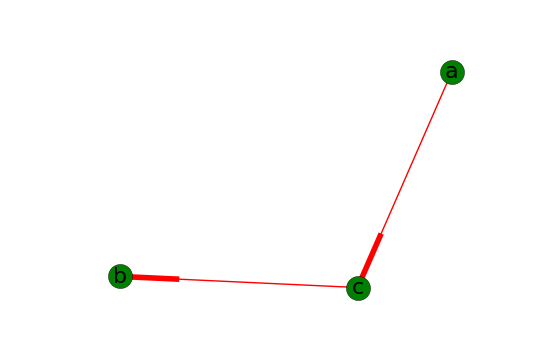

In [11]:
# Plot the learned BN graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Set up the graph 
G = nx.DiGraph()
red_edges = bn.E
G.add_edges_from(bn.E)
values = bn.V
labels = dict(zip(values,values))

# Plots ...
plt.figure()
plt.axis('off')
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_nodes(G,pos,nodelist=values,node_color='g')
nx.draw_networkx_labels(G,pos,labels,font_size=16)


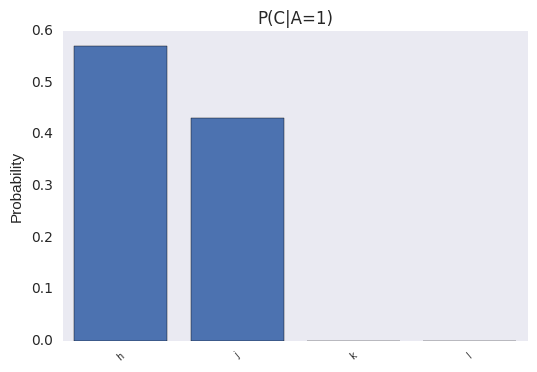

In [12]:
# Plot distributions
# P(C|A=1)
fig, ax = plt.subplots()
idx = np.arange(4)
bn.Vdata['c']['cprob']
ax.bar(idx, bn.Vdata['c']['cprob']["['1']"], align='center')
plt.grid(False)
plt.ylabel("Probability")
list_item = variables['c']

ax.set_xticks(np.arange(len(list_item)))
ax.set_xticklabels(list_item,rotation=40,fontsize='x-small')
plt.title('P(C|A=1)')
#plt.plot()

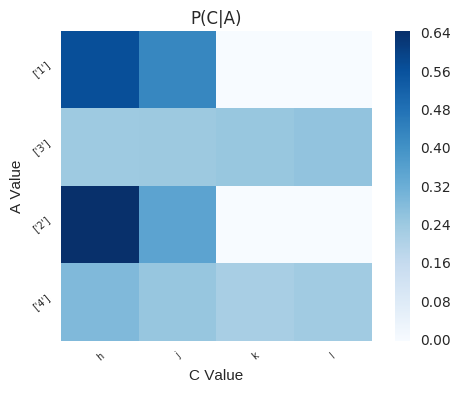

In [22]:

# Set up up variables
cpds = bn.Vdata['c']['cprob']
cpd_idx = cpds.keys()
c_vals = variables['c']
p_vals = np.vstack(map(lambda x: cpds[x], cpd_idx))
xvals = variables['c']
yvals = cpd_idx

# Plot simple matplot lib way ..
fig, ax = plt.subplots()
#plt.imshow(p_vals, cmap='hot',interpolation='nearest')
#plt.imshow(p_vals, cmap='nipy_spectral', interpolation='nearest')
#plt.imshow(p_vals, cmap='jet', interpolation='nearest')
#plt.imshow(p_vals, cmap='gnuplot', interpolation='nearest')
plt.imshow(p_vals, cmap=matplotlib.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title("P(C|A)")
plt.grid(False)
plt.xlabel("C Value")
plt.ylabel("A Value")

ax.set_xticks(np.arange(len(xvals)))
ax.set_xticklabels(xvals,rotation=40,fontsize='x-small')

ax.set_yticks(np.arange(len(yvals)))
ax.set_yticklabels(yvals,rotation=40,fontsize='x-small')

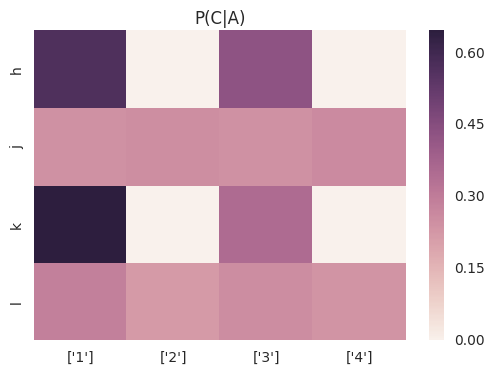

In [23]:

# Super simple pandas version heatmap
import pandas as pd
vd = {}
for i,xv in enumerate(xvals):
    for j,yv in enumerate(yvals):
       vd[(xv,yv)] = p_vals[i,j]
ser = pd.Series(list(vd.values()),
                  index=pd.MultiIndex.from_tuples(vd.keys()))
df = ser.unstack().fillna(0)
df.shape
import seaborn as sns
plt.title('P(C|A)')
sns.heatmap(df);

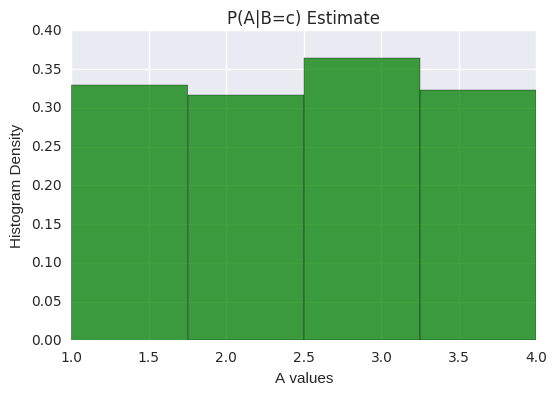

In [40]:
# Plot some sampled distributions

evidence = {'b': 'c'}
nsamp = 10000
result = bn.randomsample(nsamp,evidence=evidence)
target_variable = 'a'
vals = map(lambda x: x[target_variable], result)
#print vals

nvals = 4
n, bins, patches = plt.hist(vals, nvals, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('A values')
plt.ylabel('Histogram Density')
plt.title("P(A|B=c) Estimate")


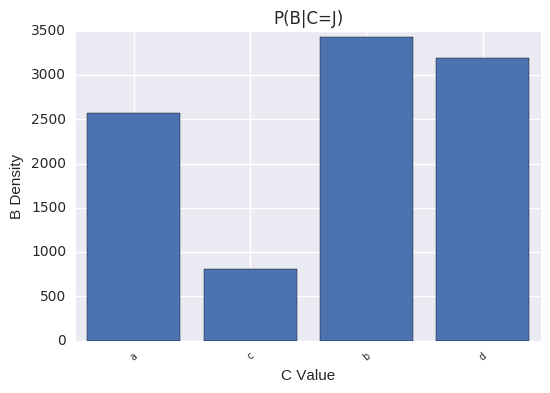

In [59]:
# Plot some distributions from random sampling with evidence

evidence = {'c': 'j'}
nsamp = 10000
result = bn.randomsample(nsamp,evidence=evidence)
target_variable = 'b'
vals = map(lambda x: x[target_variable], result)
#print vals

nvals = len(vals)
#print vals

from collections import Counter; 
hist = Counter(vals)

fig, ax = plt.subplots()
idx = np.arange(len(hist.values()))
ax.bar(idx, hist.values(), align='center')
ax.set_xticks(np.arange(len(hist.keys())))
ax.set_xticklabels(hist.keys(),rotation=40,fontsize='x-small')
plt.title('P(B|C=J)')
plt.xlabel('C Value')
plt.ylabel('B Density')
